In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
df = pd.read_csv("TaylorRuleData.csv", index_col = 0)


In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.dropna(inplace=True)


# 2.) Split your data into Train, Test Holdout

In [5]:
split1 = int(len(df) * .6)
split2 = int(len(df) * .9)
data_in = df[:split1]
data_out = df[split1:split2]
data_hold = df[split2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_in.iloc[:,0]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Graph for your model

In [9]:
import matplotlib.pyplot as plt

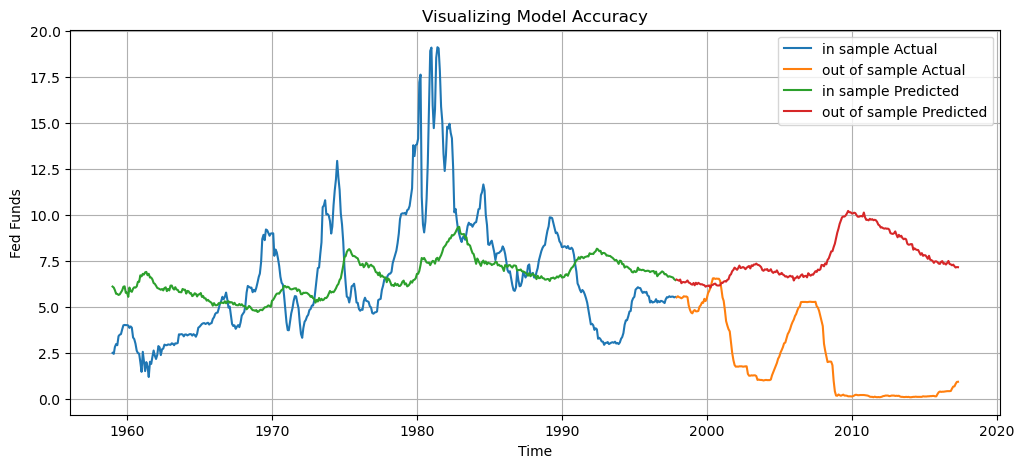

In [10]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["in sample Actual", 'out of sample Actual', 'in sample Predicted', 'out of sample Predicted'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [13]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
max_degrees = 3

Degrees:  1


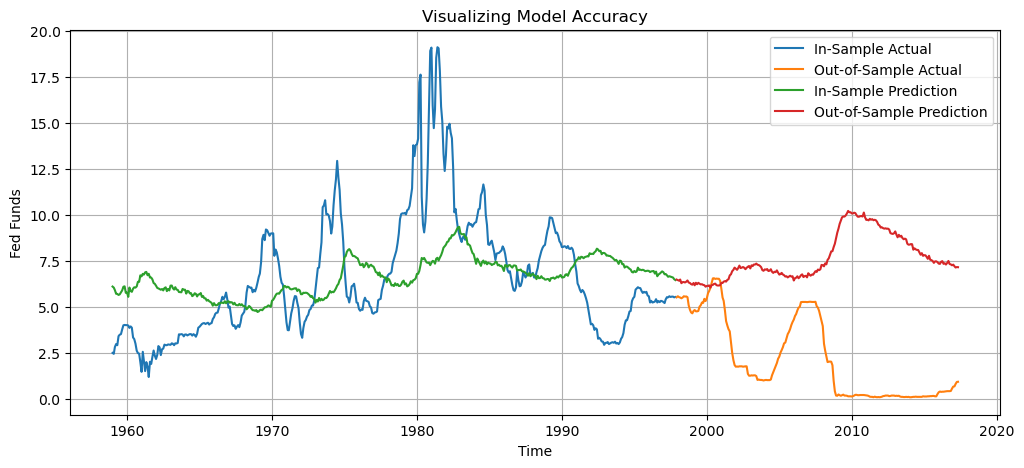

In-sample MSE :  10.071422013168641
Out-sample MSE :  40.360827835666804 

Degrees:  2


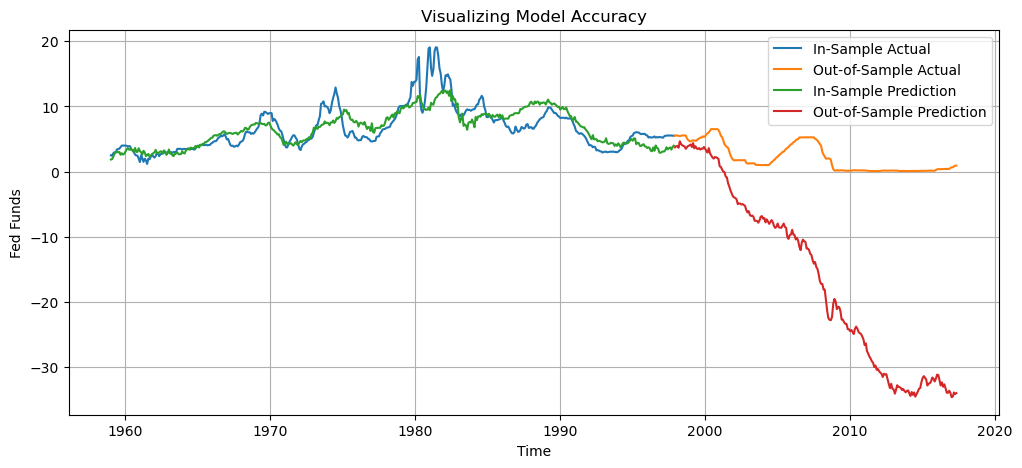

In-sample MSE :  3.863477139276068
Out-sample MSE :  481.4465099024112 

Degrees:  3


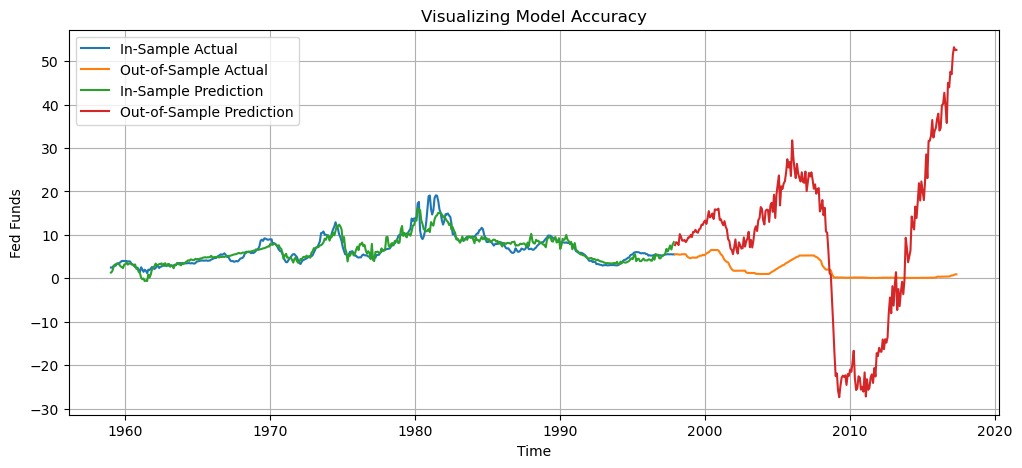

In-sample MSE :  1.8723636267986143
Out-sample MSE :  371.7663885894949 



In [16]:
for degrees in range(1, 1 + max_degrees):
    print("Degrees: ", degrees)
    poly = PolynomialFeatures(degree=degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    #Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #Q4
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)

    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-Sample Actual", 'Out-of-Sample Actual', 'In-Sample Prediction', 'Out-of-Sample Prediction'])
    plt.grid()
    plt.show()
    
    #Q5
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("In-sample MSE : ", in_mse_1)
    print("Out-sample MSE : ", out_mse_1,"\n")


# 7.) Observations :

- The model with degree1 seems to be underfitting the data due to oversimplification. 
- As complexity of the model increases to degrees 2 and 3, the in-sample MSE decreases as expected. But Out-sample MSE increases- from over 40 to 481 and 371. This is an indicator of model fitting well to the training data but failing to perform well on the testing data, due to overfitting.
- An unexpected change is the decrese in in-sample MSE from degree2 to 3, but at the same time out-sample MSE also decreased.
